Cтворити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras as k
import tensorflow as tf

from keras.optimizers import RMSprop, Adam

In [3]:
from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 10000
maxlen = 500
batch_size = 128

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [4]:
def plot_history(hst, title = ''):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_accuracy']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.legend()
    plt.grid()

    plt.tight_layout()

    plt.suptitle(title)
    plt.show()

In [5]:
word_index = k.datasets.imdb.get_word_index()
inverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def get_readable_text(array_index_word: np.array) -> str:
    return ' '.join([inverse_word_index.get(word_index - 3 , '') for word_index in array_index_word]).strip()

In [6]:
get_readable_text(x_train[0])

"this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the 

In [7]:
models = {}
result_models = {}

from tqdm.keras import TqdmCallback


d:\project_GoIT\Python\Python\DS-HW-01\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
def evaluate_model(model):
    test_loss, test_acc = model.evaluate(x_test, y_test)

    print(f"Model {model.name} Test accuracy:  {test_acc}")

    result_models[model.name] = test_acc

MODEL RNN

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense

In [10]:


# model =Sequential()
# # Створення порожньої моделі Sequential

# # Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
# model.add(Embedding(max_features, 32))
# # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# # Додавання LSTM шару з 32 вузлами
# model.add(SimpleRNN(32))
# # Параметр: кількість вузлів (розмір прихованого стану)

# # Додавання Dense шару з одним вузлом та активацією sigmoid
# model.add(Dense(1, activation='sigmoid'))
# # Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

model = k.models.Sequential(
    [
        k.layers.Embedding(max_features, 32),
        k.layers.SimpleRNN(32),
        k.layers.Dense(1, activation="sigmoid"),
    ],
    name="Simple_RNN"
)

model.summary()

model.compile(
    optimizer=RMSprop(learning_rate=0.001), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=0,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=8, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=8, restore_best_weights=True, start_from_epoch=5
        ),
        TqdmCallback(verbose=0)
    ]
)

models[model.name] = model

Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 50%|█████     | 15/30 [05:54<05:54, 23.66s/epoch, accuracy=0.994, loss=0.0223, val_accuracy=0.802, val_loss=0.988]


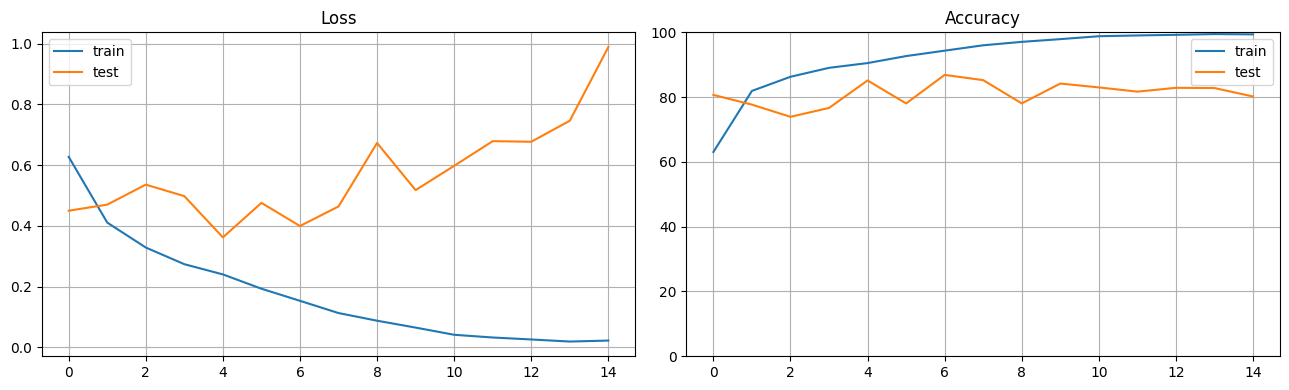

In [11]:
plot_history(history)

In [12]:
evaluate_model(model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8682 - loss: 0.4004
Model Simple_RNN Test accuracy:  0.8686000108718872


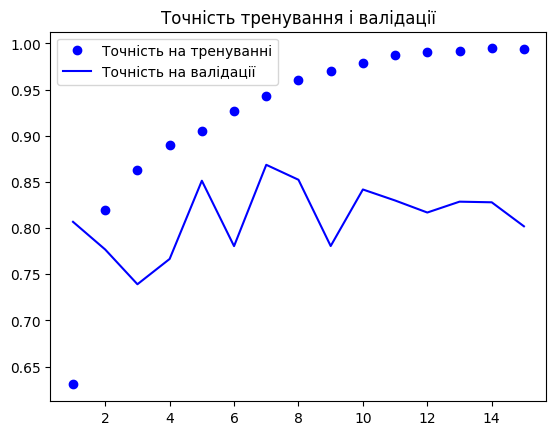

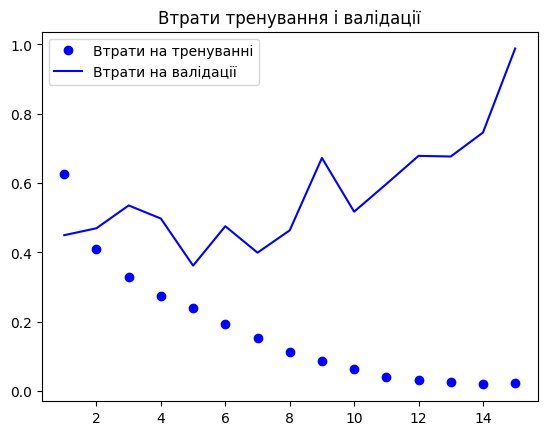

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Model GRU

In [14]:
model = k.models.Sequential(
    [
        k.layers.Embedding(max_features, 32),
        k.layers.GRU(32),
        k.layers.Dense(1, activation="sigmoid"),
    ],
    name="GRU"
)

model.summary()

model.compile(
    optimizer=RMSprop(learning_rate=0.001), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=0,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=8, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=8, restore_best_weights=True, start_from_epoch=5
        ),
        TqdmCallback(verbose=0)
    ]
)

models[model.name] = model

Model: "GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 57%|█████▋    | 17/30 [18:12<13:55, 64.26s/epoch, accuracy=0.969, loss=0.0943, val_accuracy=0.876, val_loss=0.4] 


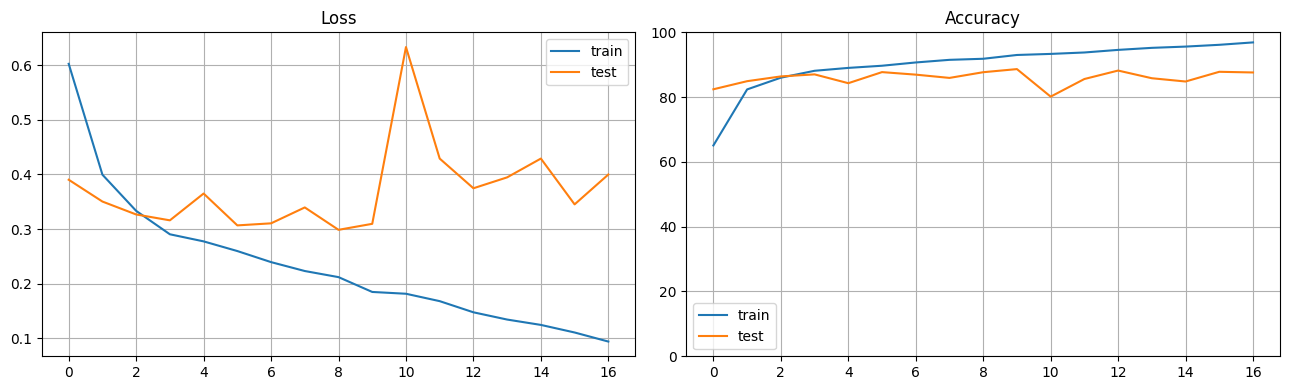

In [15]:
plot_history(history)

In [16]:
evaluate_model(model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8761 - loss: 0.3004
Model GRU Test accuracy:  0.8768799901008606


MODEL LSTM

In [17]:
model = k.models.Sequential(
    [
        k.layers.Embedding(max_features, 32),
        k.layers.LSTM(32),
        k.layers.Dense(1, activation="sigmoid"),
    ],
    name="LSTM"
)

model.summary()

model.compile(
    optimizer=RMSprop(learning_rate=0.001), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=0,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=8, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=8, restore_best_weights=True, start_from_epoch=5
        ),
        TqdmCallback(verbose=0)
    ]
)

models[model.name] = model

Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 53%|█████▎    | 16/30 [16:33<14:29, 62.11s/epoch, accuracy=0.963, loss=0.108, val_accuracy=0.875, val_loss=0.353]


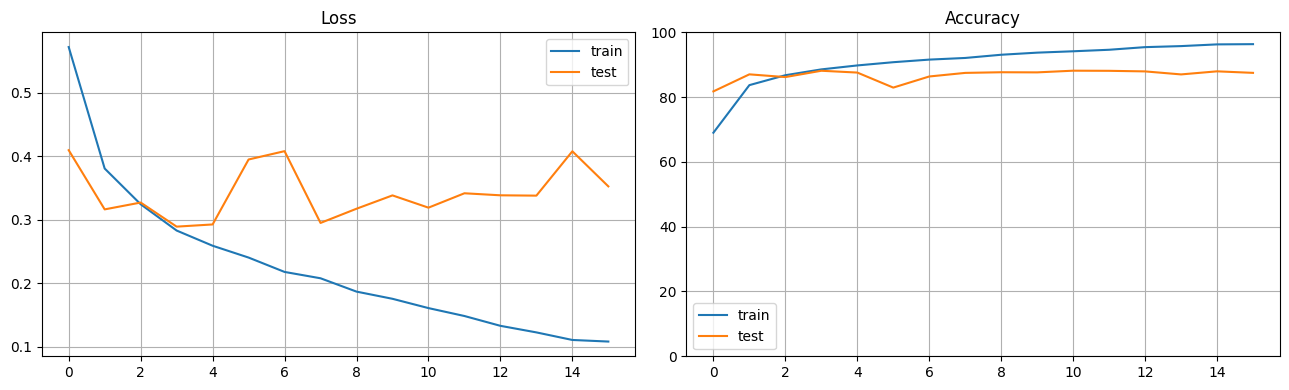

In [18]:
plot_history(history)

In [19]:
evaluate_model(model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8718 - loss: 0.3002
Model LSTM Test accuracy:  0.8748400211334229


MODEL BRNN (Bidirectional)

In [20]:
model = k.models.Sequential(
    [
        k.layers.Embedding(max_features, 32),
        k.layers.Bidirectional(k.layers.LSTM(32)),
        k.layers.Dense(1, activation="sigmoid"),
    ],
    name="Bidirectional_LSTM"
)

model.summary()

model.compile(
    optimizer=RMSprop(learning_rate=0.001), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=0,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=8, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=8, restore_best_weights=True, start_from_epoch=5
        ),
        TqdmCallback(verbose=0)
    ]
)

models[model.name] = model

Model: "Bidirectional_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 53%|█████▎    | 16/30 [23:27<20:31, 87.95s/epoch, accuracy=0.963, loss=0.108, val_accuracy=0.885, val_loss=0.344]


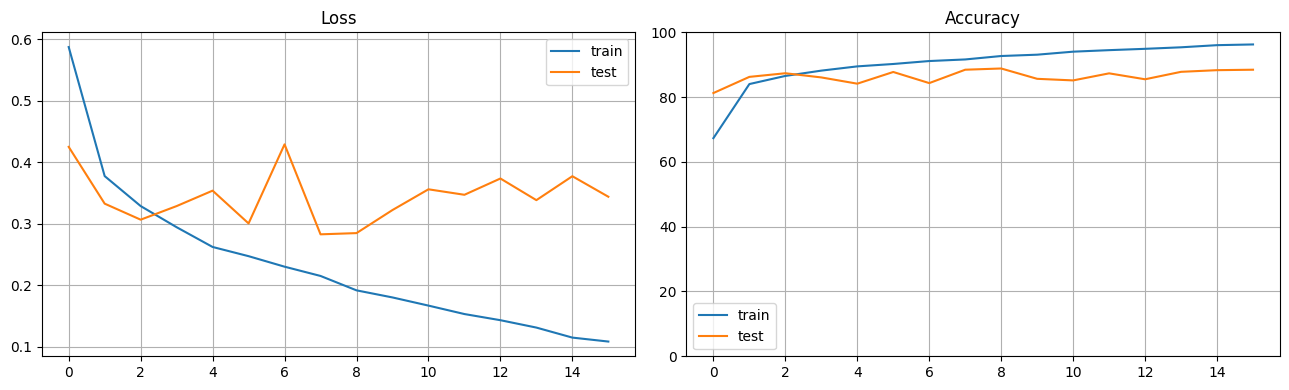

In [21]:
plot_history(history)

In [22]:
evaluate_model(model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.8833 - loss: 0.2866
Model Bidirectional_LSTM Test accuracy:  0.8845999836921692


MODEL Deep RNN

In [23]:
model = k.models.Sequential(
    [
        k.layers.Embedding(max_features, 32),
        k.layers.Bidirectional(k.layers.LSTM(32, return_sequences=True)),
        k.layers.Bidirectional(k.layers.LSTM(32)),
        k.layers.Dense(1, activation="sigmoid"),
    ],
    name="Deep_LSTM"
)

model.summary()

model.compile(
    optimizer=RMSprop(learning_rate=0.001), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=0,
    callbacks=[
        k.callbacks.EarlyStopping(
            monitor="val_accuracy", patience=8, restore_best_weights=True
        ),
        k.callbacks.EarlyStopping(
            monitor="val_loss", patience=8, restore_best_weights=True, start_from_epoch=5
        ),
        TqdmCallback(verbose=0)
    ]
)

models[model.name] = model

Model: "Deep_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 40%|████      | 12/30 [42:07<1:03:11, 210.62s/epoch, accuracy=0.964, loss=0.106, val_accuracy=0.864, val_loss=0.462]


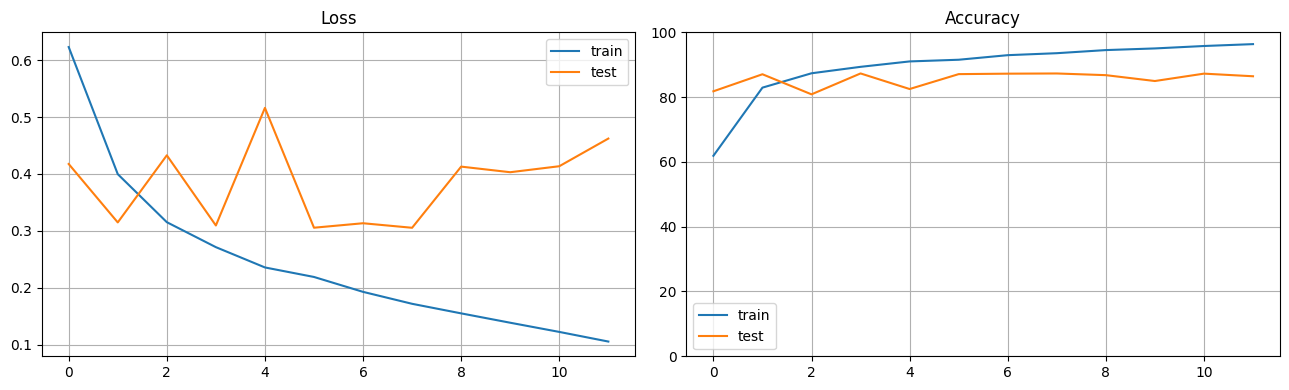

In [24]:
plot_history(history)

In [25]:
evaluate_model(model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.8696 - loss: 0.3113
Model Deep_LSTM Test accuracy:  0.8730000257492065


Optimization

In [54]:
from itertools import product

In [55]:
update_models = {}

optimizers = [Adam]

learning_rates = [0.002]

batch_sizes = [256, 512]

idx: 1 optimizer: Adam learning_rate: 0.002 batch_size: 256


 37%|███▋      | 11/30 [02:57<05:07, 16.17s/epoch, accuracy=0.991, loss=0.0283, val_accuracy=0.809, val_loss=0.82]


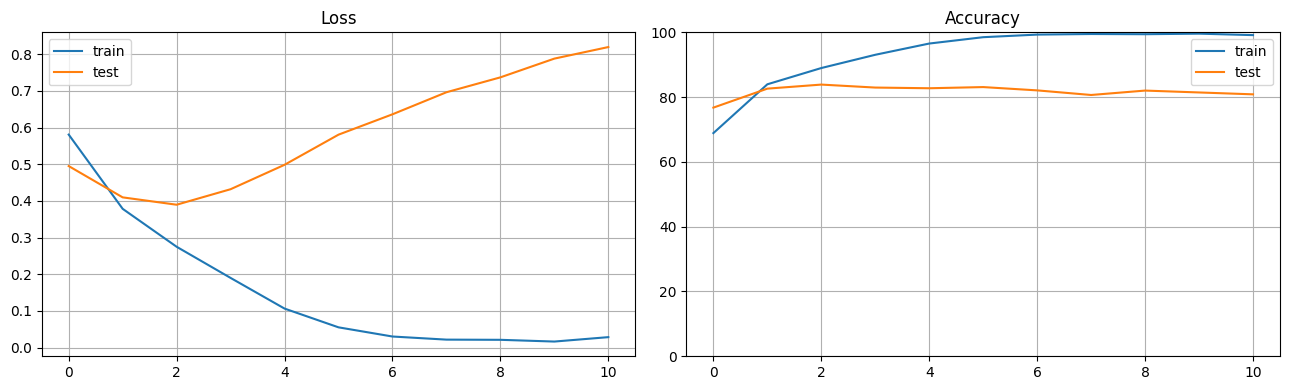

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8301 - loss: 0.5877
Model Simple_RNN_1 Test accuracy:  0.8310400247573853


 40%|████      | 12/30 [13:17<19:56, 66.50s/epoch, accuracy=0.987, loss=0.0428, val_accuracy=0.862, val_loss=0.586]


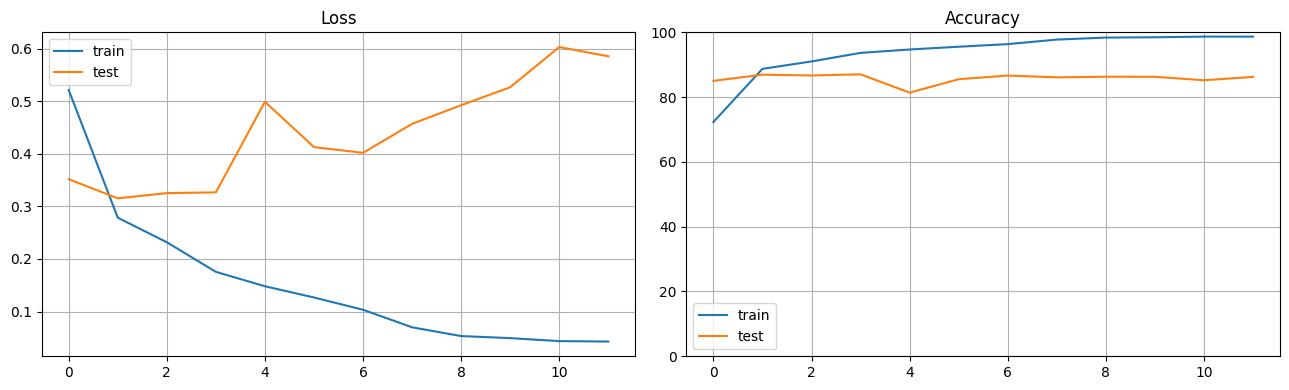

782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.8669 - loss: 0.4071
Model GRU_1 Test accuracy:  0.8665599822998047


 40%|████      | 12/30 [11:54<17:51, 59.55s/epoch, accuracy=0.968, loss=0.0932, val_accuracy=0.859, val_loss=0.48]


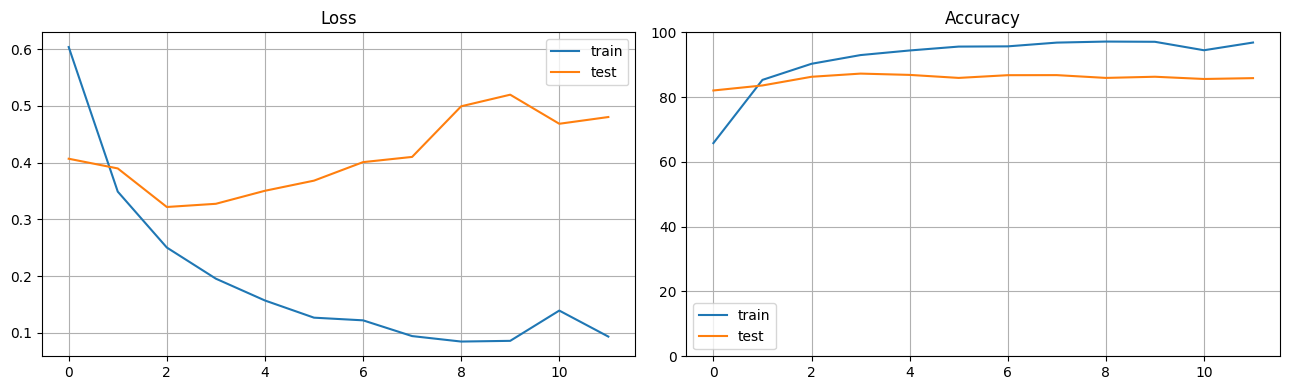

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.8578 - loss: 0.3758
Model LSTM_1 Test accuracy:  0.8593199849128723


 37%|███▋      | 11/30 [30:16<52:17, 165.11s/epoch, accuracy=0.98, loss=0.0645, val_accuracy=0.861, val_loss=0.449]


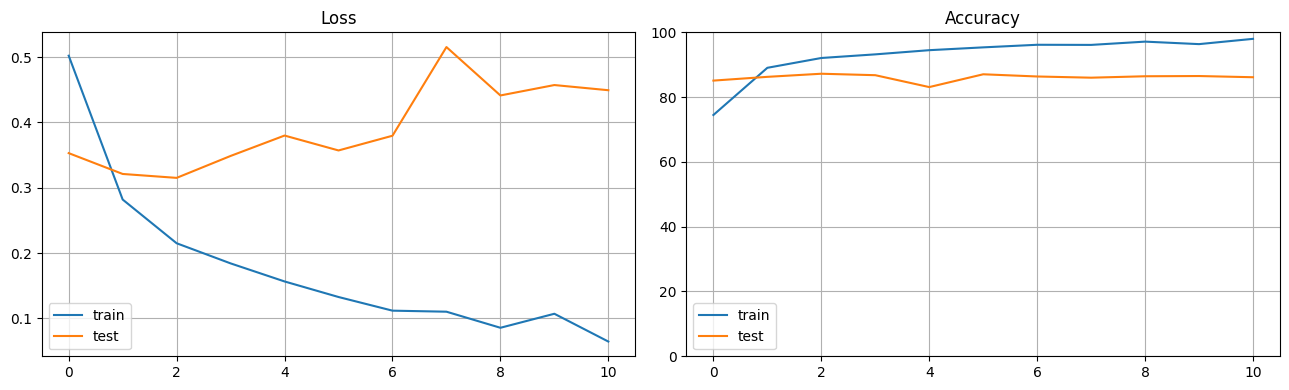

782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8713 - loss: 0.3564
Model Bidirectional_LSTM_1 Test accuracy:  0.8704800009727478


 40%|████      | 12/30 [2:19:57<3:29:56, 699.81s/epoch, accuracy=0.992, loss=0.029, val_accuracy=0.858, val_loss=0.662]


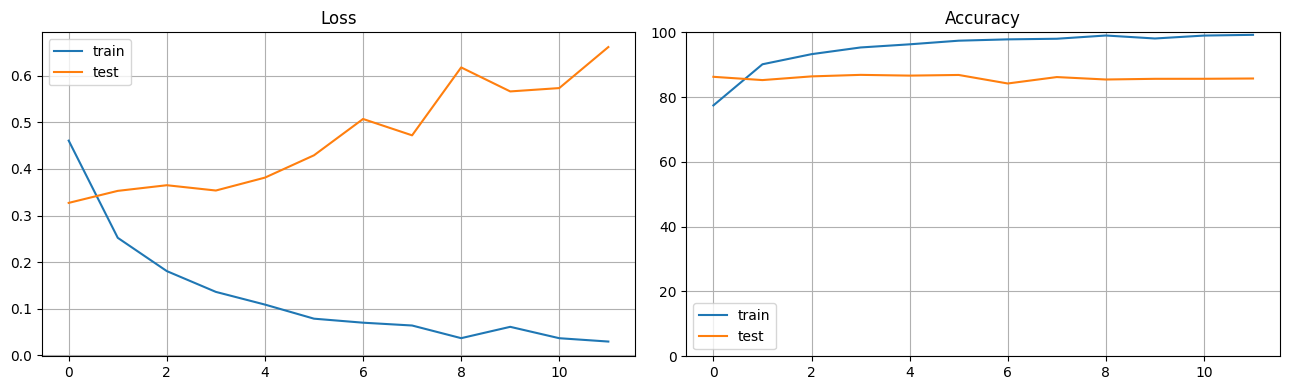

782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.8662 - loss: 0.4334
Model Deep_LSTM_1 Test accuracy:  0.8683599829673767
idx: 2 optimizer: Adam learning_rate: 0.002 batch_size: 512


 47%|████▋     | 14/30 [03:25<03:55, 14.70s/epoch, accuracy=1, loss=0.00382, val_accuracy=0.799, val_loss=0.744]


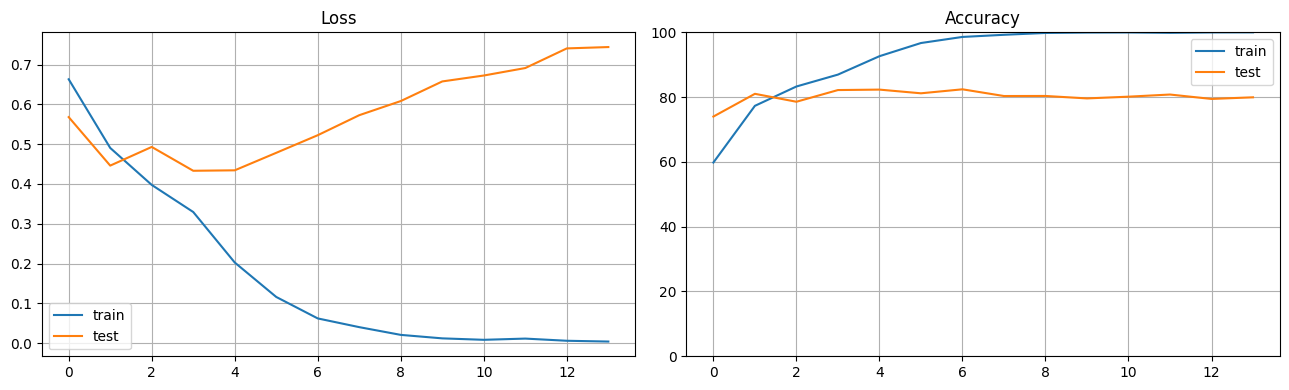

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8093 - loss: 0.4834
Model Simple_RNN_2 Test accuracy:  0.8118000030517578


 40%|████      | 12/30 [12:39<18:59, 63.29s/epoch, accuracy=0.975, loss=0.0755, val_accuracy=0.851, val_loss=0.552]


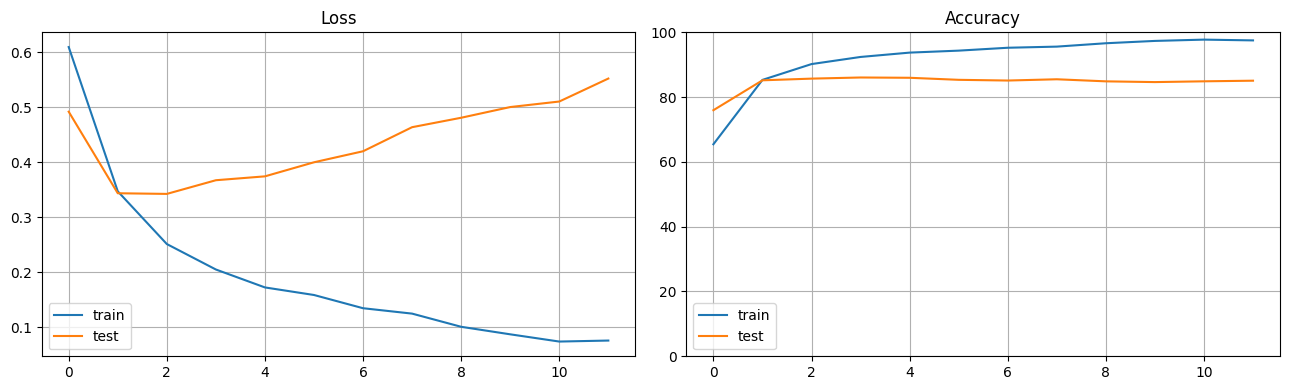

782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.8547 - loss: 0.3947
Model GRU_2 Test accuracy:  0.85343998670578


 40%|████      | 12/30 [10:35<15:53, 52.95s/epoch, accuracy=0.792, loss=0.43, val_accuracy=0.739, val_loss=0.517]


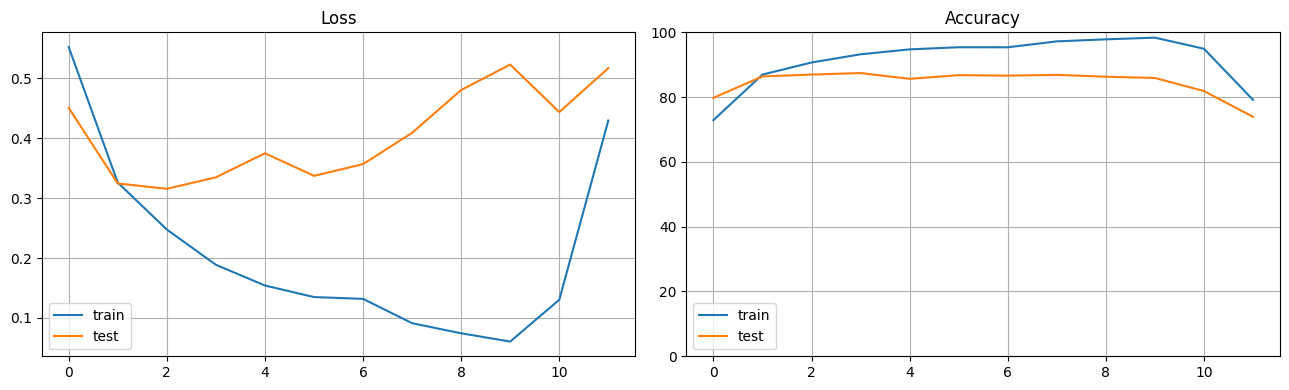

782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.8685 - loss: 0.3391
Model LSTM_2 Test accuracy:  0.8678399920463562


 40%|████      | 12/30 [22:47<34:11, 113.95s/epoch, accuracy=0.946, loss=0.146, val_accuracy=0.859, val_loss=0.448]


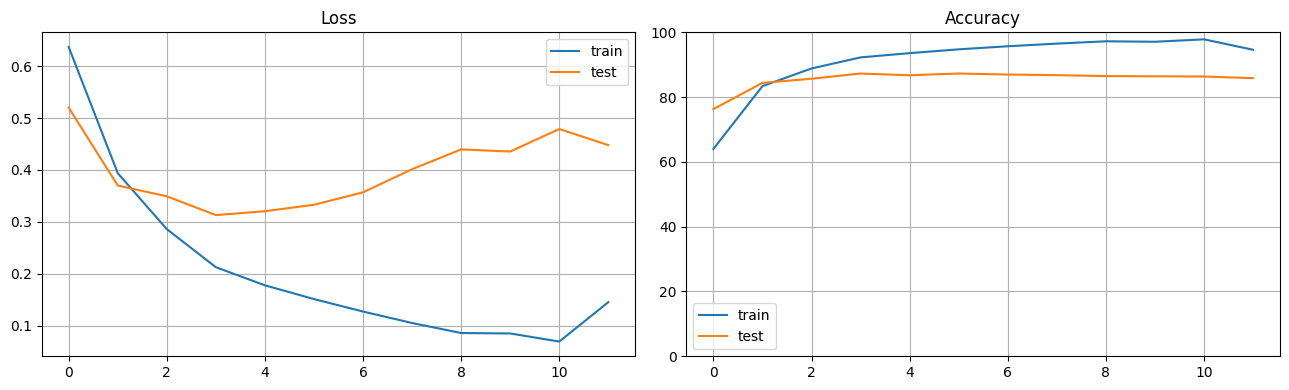

782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8702 - loss: 0.3363
Model Bidirectional_LSTM_2 Test accuracy:  0.872759997844696


  0%|          | 0/30 [4:14:12<?, ?epoch/s]


KeyboardInterrupt: 

In [57]:
params = product(optimizers, learning_rates, batch_sizes)

for idx, i in enumerate(params):

    optimizer, learning_rate, batch_size = i

    print(
        f"idx: {idx+1} optimizer: {optimizer.__name__} learning_rate: {learning_rate} batch_size: {batch_size}"
    )

    for model_name, model in models.items():

        model_update = k.models.clone_model(model)

        model_update.name = model_name + f"_{idx+1}"

        model_update.compile(
            optimizer=optimizer(learning_rate=learning_rate),
            loss="binary_crossentropy",
            metrics=["accuracy"],
        )

        history = model_update.fit(
            x_train,
            y_train,
            epochs=30,
            batch_size=batch_size,
            validation_data=(x_test, y_test),
            verbose=0,
            callbacks=[
                k.callbacks.EarlyStopping(
                    monitor="val_accuracy", patience=8, restore_best_weights=True
                ),
                k.callbacks.EarlyStopping(
                    monitor="val_loss",
                    patience=8,
                    restore_best_weights=True,
                    start_from_epoch=5,
                ),
                TqdmCallback(verbose=0),
            ],
        )

        update_models[model_update.name] = model_update

        plot_history(history)

        evaluate_model(model_update)

 53%|█████▎    | 16/30 [04:55<04:18, 18.45s/epoch, accuracy=0.981, loss=0.0639, val_accuracy=0.84, val_loss=0.486]


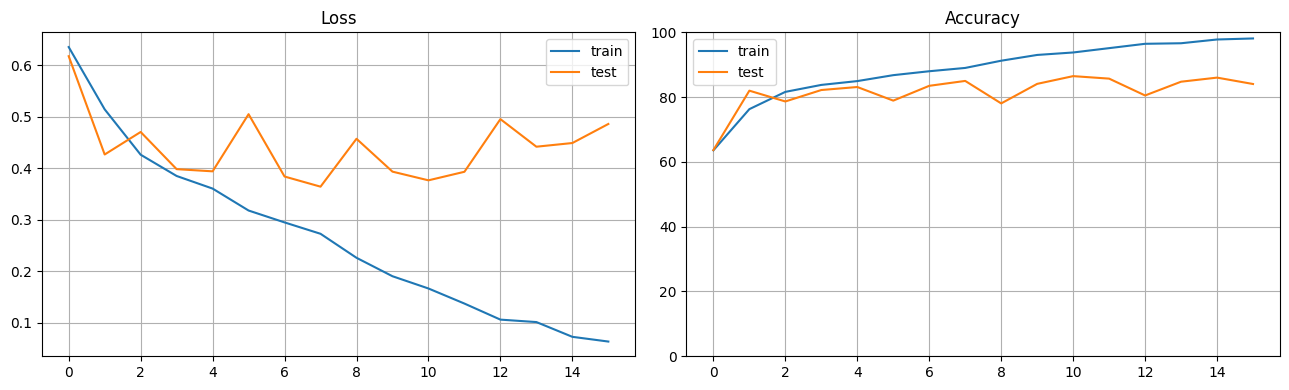

782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8485 - loss: 0.3661
Model Simple_RNN_ Test accuracy:  0.8499600291252136


 67%|██████▋   | 20/30 [21:54<10:57, 65.74s/epoch, accuracy=0.904, loss=0.241, val_accuracy=0.855, val_loss=0.347]


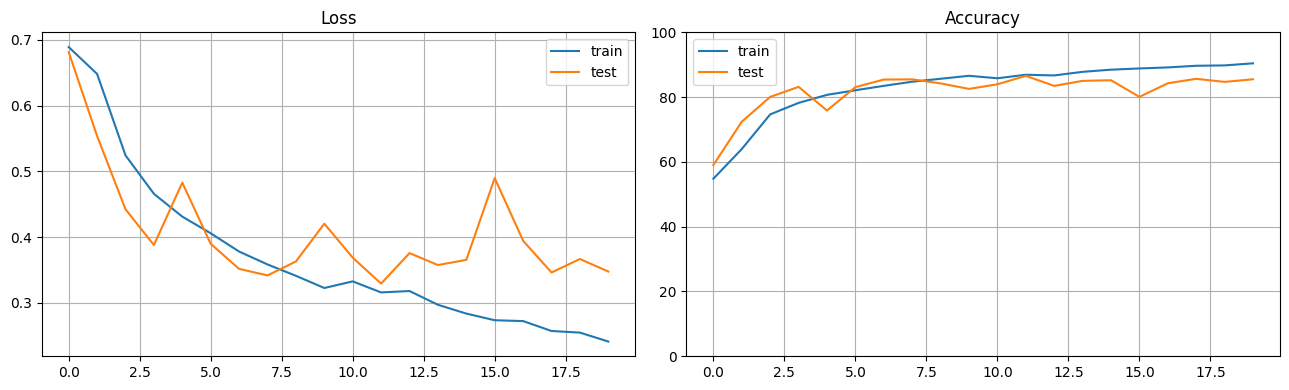

782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.8655 - loss: 0.3275
Model GRU_ Test accuracy:  0.8655999898910522


 87%|████████▋ | 26/30 [23:13<03:34, 53.60s/epoch, accuracy=0.925, loss=0.198, val_accuracy=0.885, val_loss=0.288]


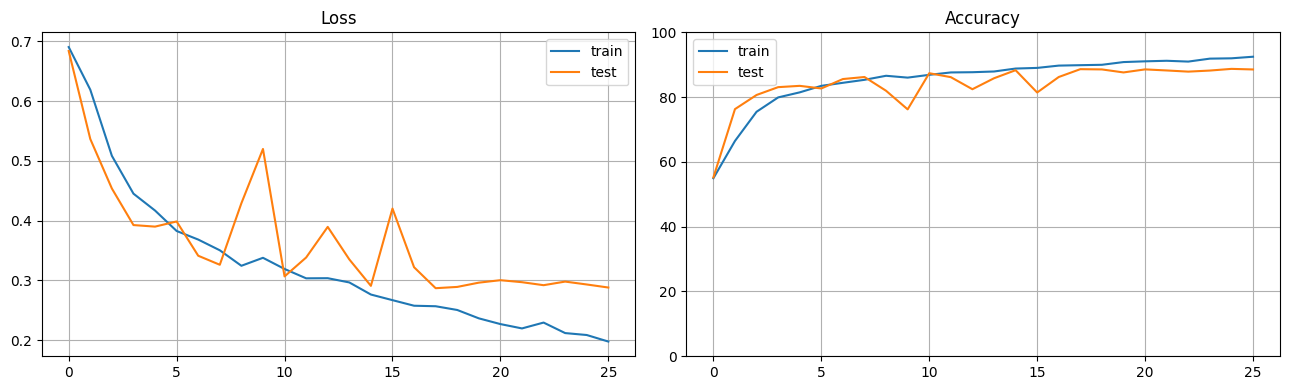

782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8853 - loss: 0.2880
Model LSTM_ Test accuracy:  0.8863199949264526


 90%|█████████ | 27/30 [54:14<06:01, 120.53s/epoch, accuracy=0.933, loss=0.175, val_accuracy=0.859, val_loss=0.366]


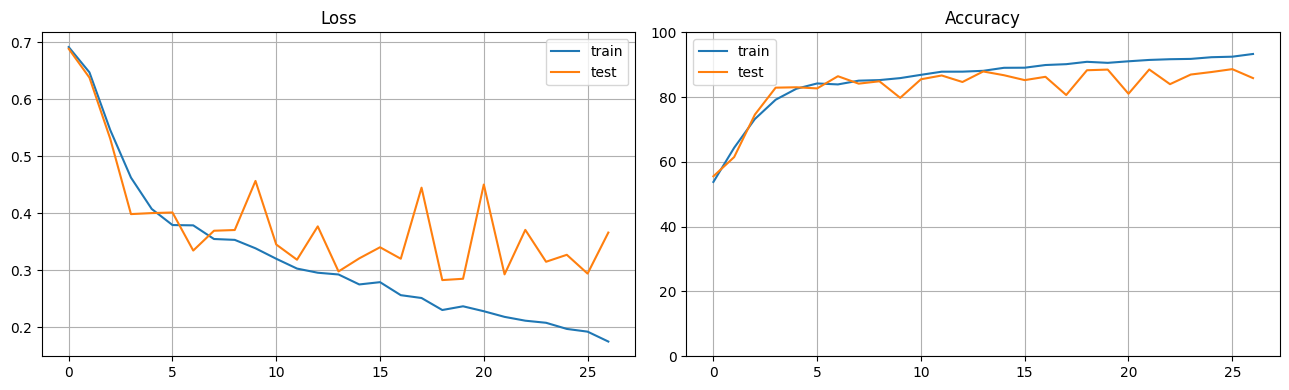

782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8810 - loss: 0.2851
Model Bidirectional_LSTM_ Test accuracy:  0.8829600214958191


In [68]:
for model_name, model in models.items() :

    if model_name == "Deep_LSTM" : continue

    model_update = k.models.clone_model(model)

    model_update.name = model_name + "_"

    model_update.compile(
        optimizer=RMSprop(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

    history = model_update.fit(
        x_train,
        y_train,
        epochs=30,
        batch_size=512,
        validation_data=(x_test, y_test),
        verbose=0,
        callbacks=[
            k.callbacks.EarlyStopping(
                monitor="val_accuracy", patience=8, restore_best_weights=True
            ),
            k.callbacks.EarlyStopping(
                monitor="val_loss",
                patience=8,
                restore_best_weights=True,
            ),
            TqdmCallback(verbose=0),
        ],
    )

    update_models[model_update.name] = model_update

    plot_history(history)

    evaluate_model(model_update)

Summary

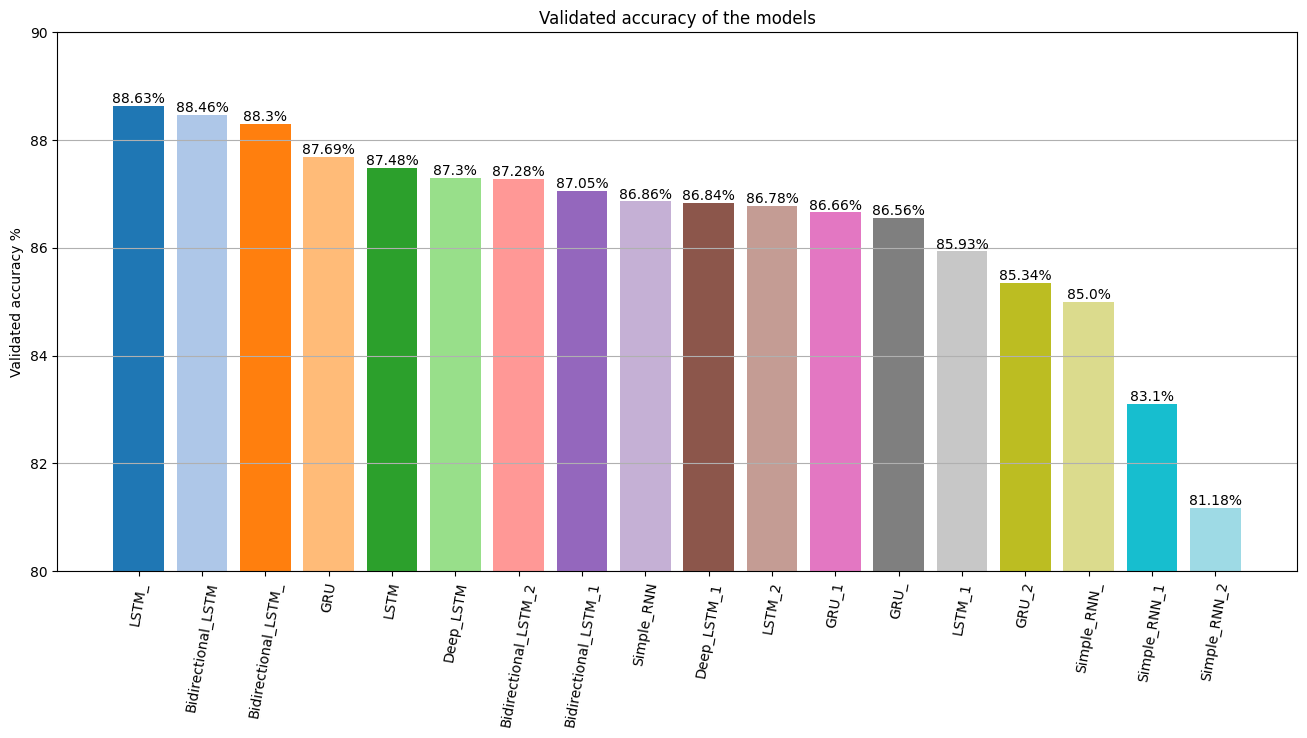

In [96]:
sorted_results = dict(sorted(result_models.items(), key=lambda x: x[1], reverse=True))

colors = plt.cm.tab20(np.linspace(0, 1, len(result_models.keys())))

height_value = [i * 100 for i in sorted_results.values()]

plt.figure(figsize=(16, 7))

bars = plt.bar(x=sorted_results.keys(), height=height_value, color=colors, width=0.8)

for bar, value in zip(bars, height_value):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{value:.4}%",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.ylim((80, 90))
plt.xticks(rotation=80)
plt.title("Validated accuracy of the models")
plt.ylabel("Validated accuracy %")

plt.grid(axis="y")
plt.show()

In [97]:
dict(sorted(result_models.items(), key=lambda x: x[1], reverse=True))

{'LSTM_': 0.8863199949264526,
 'Bidirectional_LSTM': 0.8845999836921692,
 'Bidirectional_LSTM_': 0.8829600214958191,
 'GRU': 0.8768799901008606,
 'LSTM': 0.8748400211334229,
 'Deep_LSTM': 0.8730000257492065,
 'Bidirectional_LSTM_2': 0.872759997844696,
 'Bidirectional_LSTM_1': 0.8704800009727478,
 'Simple_RNN': 0.8686000108718872,
 'Deep_LSTM_1': 0.8683599829673767,
 'LSTM_2': 0.8678399920463562,
 'GRU_1': 0.8665599822998047,
 'GRU_': 0.8655999898910522,
 'LSTM_1': 0.8593199849128723,
 'GRU_2': 0.85343998670578,
 'Simple_RNN_': 0.8499600291252136,
 'Simple_RNN_1': 0.8310400247573853,
 'Simple_RNN_2': 0.8118000030517578}

Visuslization

In [81]:
m = list(update_models.keys())[11]
m

<Sequential name=LSTM_, built=True>

In [101]:
best_model_name = "LSTM_"

answers = ["Negative", "Positive"]

print("///////////////////////////////")
for _ in range(5):
    random_in_test = np.random.randint(0, len(x_test), 10)
    x_random = x_test[random_in_test]
    y_random = y_test[random_in_test]

    random_predict = update_models[m].predict(x_random, verbose=0)
    
    for idx, i in enumerate(np.argmax(random_predict, axis=1)):
        value_correct = y_random[idx] == i
        result = answers[i] + ('' if value_correct else ('; real: ' + answers[y_random[idx]]))
        print(f"{idx + 1} Predict correct: {value_correct} \n", f"TEXT: {get_readable_text(x_random[idx])[:150]}... \n", f"RESULT: {result}")

    print("///////////////////////////////")

///////////////////////////////
1 Predict correct: False 
 TEXT: one of the best things about this dvd is that on disc 1 a whole concert and many television appearances can be found for instance the whole royal albe... 
 RESULT: Negative; real: Positive
2 Predict correct: True 
 TEXT: jack  straightforward thriller about a guilt ridden ira  forced into one last job where have i heard that plot before gets a  treatment from cult dire... 
 RESULT: Negative
3 Predict correct: False 
 TEXT: this is the   film tom  has lost none of his humour and style and is not showing signs of getting tired the film has a very satisfying story with lots... 
 RESULT: Negative; real: Positive
4 Predict correct: False 
 TEXT: i loved complete  why did they  it anyway they should have made a second season and so on god they always  the good shows and leave all the boring stu... 
 RESULT: Negative; real: Positive
5 Predict correct: False 
 TEXT: i believe it has been over 40 years since i saw this series yet 

In [102]:
best_model_name = "Bidirectional_LSTM"

answers = ["Negative", "Positive"]

print("///////////////////////////////")
for _ in range(5):
    random_in_test = np.random.randint(0, len(x_test), 10)
    x_random = x_test[random_in_test]
    y_random = y_test[random_in_test]

    random_predict = models[best_model_name].predict(x_random, verbose=0)
    
    for idx, i in enumerate(np.argmax(random_predict, axis=1)):
        value_correct = y_random[idx] == i
        result = answers[i] + ('' if value_correct else ('; real: ' + answers[y_random[idx]]))
        print(f"{idx + 1} Predict correct: {value_correct} \n", f"TEXT: {get_readable_text(x_random[idx])[:150]}... \n", f"RESULT: {result}")

    print("///////////////////////////////")

///////////////////////////////
1 Predict correct: True 
 TEXT: i really tried to like this film about a doctor who has the possibility of a new life with a young woman if he can comes to terms with the death of hi... 
 RESULT: Negative
2 Predict correct: False 
 TEXT: the only complaint i heard about this film was that it was slow though perhaps this is the point the two characters clash and the slow build up of ten... 
 RESULT: Negative; real: Positive
3 Predict correct: False 
 TEXT: i'm just starting to explore the so far wonderful world of   i've seen only 4 films so far and with the last one in the row it hit me that all of them... 
 RESULT: Negative; real: Positive
4 Predict correct: True 
 TEXT: i've enjoyed watching lost from the beginning and endured a few bad actors in poorly written episodes because when lost is good it's really good but t... 
 RESULT: Negative
5 Predict correct: True 
 TEXT: i've seen about a half dozen of the low budget poverty row b westerns that ken  ma